In [1]:
import time

import numpy as np

import scipy

import specutils
from specutils import Spectrum1D

from jdaviz import CubeViz

from regions import CircleSkyRegion

from photutils import CircularAperture, SkyCircularAperture, aperture_photometry 

from astropy.io import fits
from astropy import wcs
import astropy.units as u
from astropy.stats import sigma_clip
from astropy.utils.data import download_file

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
# NIRSpec IFU science data cube
BoxPath = "https://data.science.stsci.edu/redirect/JWST/jwst-data_analysis_tools/IFU_optimal_extraction/"
filename = BoxPath + "NRS00001-faintQSO-F100LP-G140H-01_1_491_SE_2020-08-25T12h15m00_s3d.fits"

# Open and inspect the file and WCS
# Load with astropy.fits.open
with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist['SCI'].data
    err = hdulist['ERR'].data
    w = wcs.WCS(hdulist[1].header)
    hdr = hdulist[1].header
    hdulist.info()
    print(w)
    
# Load with Spectrum1D    
spec1d = Spectrum1D.read(filename)

# Wavelengths
wavelength = np.array(spec1d.spectral_axis.value)
print(wavelength)

# Sum over spaxels
fnu_sum = np.sum(spec1d.flux, axis=(0, 1))

# List of cube slices for aperture photometry
data = []
var = []
spec1d_len = len(spec1d.spectral_axis.value)
for idx in range(spec1d_len): 
    data.append(sci[idx, :, :])
    var.append(err[idx, :, :])  # variance = err, not variance = err**2.  Squaring the err gives noisy results. 

# Window data and variance (and replace NaNs)
# The existing JWST pipeline window is overgenerous (39x33 instead of the nominal 30x30 pixels)
data_win = np.nan_to_num(np.array(data)[:, 5:-4, 3:])
data_var = np.nan_to_num(np.array(var)[:, 5:-4, 3:]) 

Filename: /Users/gough/.astropy/cache/download/url/edf217f740cafc32b47d3470859a08cd/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     295   ()      
  1  SCI           1 ImageHDU        64   (33, 39, 2059)   float32   
  2  ERR           1 ImageHDU        12   (33, 39, 2059)   float32   
  3  DQ            1 ImageHDU        12   (33, 39, 2059)   int32 (rescales to uint32)   
  4  WMAP          1 ImageHDU        10   (33, 39, 2059)   float32   
  5  ASDF          1 BinTableHDU     11   1R x 1C   [10315B]   


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVE'  
CRVAL : 156.1778928912249  -45.68697658856264  9.665214562483711e-07  
CRPIX : 17.0  20.0  1.0  
PC1_1 PC1_2 PC1_3  : -0.8098302221786426  -0.586664308822422  0.0  
PC2_1 PC2_2 PC2_3  : -0.586664308822422  0.8098302221786426  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 2.77777781916989e-05  2.77777781916989e-05  2.3499999952036797e-10  
NAXIS : 33  39  2059


[0.96652146 0.96675646 0.96699146 ... 1.44968146 1.44991646 1.45015146]


In [4]:
cubeviz = CubeViz()
cubeviz.app

Application(config='cubeviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_selected', 'd…

In [5]:
# Data from local directory
# cubeviz.app.load_data(filename)

# Data from url:
url = filename
df = download_file(url)
time.sleep(2)  # Sleep to avoid glue-jupyter timing issue
cubeviz.app.load_data(df)

  warnings.warn("Input WCS indicates that the spectral axis is not"



2022-04-25 16:36:21,395 - stpipe - WARNING - /Users/gough/opt/miniconda3/envs/py3810/lib/python3.8/site-packages/specutils/spectra/spectrum1d.py:202: UserWarning: Input WCS indicates that the spectral axis is not last. Reshaping arrays to put spectral axis last.
  warnings.warn("Input WCS indicates that the spectral axis is not"



  warnings.warn("Input WCS indicates that the spectral axis is not"



  warnings.warn("Input WCS indicates that the spectral axis is not"



2022-04-25 16:36:21,411 - stpipe - WARNING - /Users/gough/opt/miniconda3/envs/py3810/lib/python3.8/site-packages/specutils/spectra/spectrum1d.py:202: UserWarning: Input WCS indicates that the spectral axis is not last. Reshaping arrays to put spectral axis last.
  warnings.warn("Input WCS indicates that the spectral axis is not"



  warnings.warn("Input WCS indicates that the spectral axis is not"



  warnings.warn("Input WCS indicates that the spectral axis is not"



2022-04-25 16:36:21,419 - stpipe - WARNING - /Users/gough/opt/miniconda3/envs/py3810/lib/python3.8/site-packages/specutils/spectra/spectrum1d.py:202: UserWarning: Input WCS indicates that the spectral axis is not last. Reshaping arrays to put spectral axis last.
  warnings.warn("Input WCS indicates that the spectral axis is not"



  warnings.warn("Input WCS indicates that the spectral axis is not"



  warnings.warn("Input WCS indicates that the spectral axis is not"



2022-04-25 16:36:21,426 - stpipe - WARNING - /Users/gough/opt/miniconda3/envs/py3810/lib/python3.8/site-packages/specutils/spectra/spectrum1d.py:202: UserWarning: Input WCS indicates that the spectral axis is not last. Reshaping arrays to put spectral axis last.
  warnings.warn("Input WCS indicates that the spectral axis is not"



  warnings.warn("Input WCS indicates that the spectral axis is not"



2022-04-25 16:36:21,690 - stpipe - WARNING - Input WCS must have exactly one axis with spectral units, found 0


2022-04-25 16:36:21,700 - stpipe - WARNING - Missing BUNIT, using count as data unit


2022-04-25 16:36:21,709 - stpipe - WARNING - Input WCS must have exactly one axis with spectral units, found 0


2022-04-25 16:36:21,712 - stpipe - WARNING - Missing BUNIT, using count as data unit


2022-04-25 16:36:21,720 - stpipe - WARNING - Input WCS must have exactly one axis with spectral units, found 0


In [6]:
cubeviz_data = cubeviz.app.data_collection[0]
try:
    region1 = cubeviz_data.get_selection_definition(format='astropy-regions')
    print(region1)
    region1_exists = True
except Exception:
    print("There are no regions selected in the cube viewer.")
    region1_exists = False

There are no regions selected in the cube viewer.


In [7]:
try:
    spectrum_subset1 = cubeviz.app.get_data_from_viewer('spectrum-viewer')['Subset 1']
    print(spectrum_subset1)
except Exception:
    print("There are no subsets selected in the spectrum viewer.")

There are no subsets selected in the spectrum viewer.


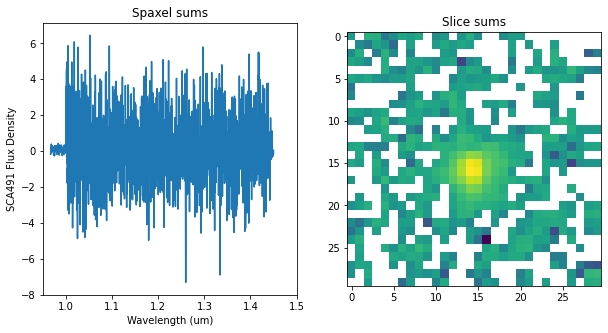

In [8]:
# Sum over wavelength
cube_sum = np.sum(data_win, axis=0)

# Plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
ax1.plot(wavelength, fnu_sum) 
ax1.set_xlim(0.95, 1.5)
ax1.set_title("Spaxel sums")
ax1.set_xlabel("Wavelength (um)")  
ax1.set_ylabel("SCA491 Flux Density")

ax2.imshow(cube_sum, norm=LogNorm())
ax2.set_title("Slice sums")

plt.show()

In [9]:
# IFU pixel scale
pixelscale = 0.1  # arcsec/pixel

# CircularAperture uses xy pixels
center_xy = [17.1, 20.]
r_pix = 5.92
if region1_exists:
    center_xy = [region1.center.x, region1.center.y]   
    r_pix = region1.radius

aperture = CircularAperture(center_xy, r=r_pix)
print(aperture)

cylinder_sum = []
for slice2d in data:
    phot_table = aperture_photometry(slice2d, aperture, wcs=w.celestial, method='exact')
    phot_table = aperture_photometry(slice2d, aperture)
    cylinder_sum.append(phot_table['aperture_sum'][0])

Aperture: CircularAperture
positions: [17.1, 20. ]
r: 5.92


In [10]:
# Reference wavelength for expanding aperture
lambda0 = wavelength[0]
print('Reference wavelength:', lambda0)

cone_sum = []
idx = -1
for (slice2d, wave) in zip(data, wavelength):
    idx = idx + 1
    r_cone = r_pix * wave / lambda0
    aperture_cone = CircularAperture(center_xy, r=r_cone)
    phot_table = aperture_photometry(slice2d, aperture_cone, wcs=w.celestial, method='exact')
    cone_sum.append(phot_table['aperture_sum'][0])

Reference wavelength: 0.9665214562483713


There is no Cubeviz Subset1 spectrum to plot.


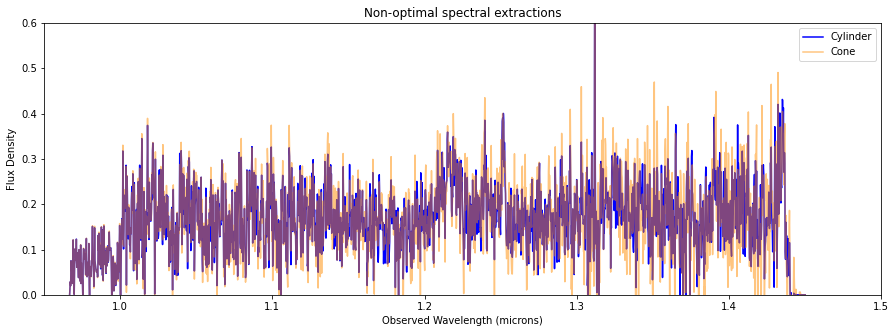

In [11]:
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5)) 

ax1.set_title("Non-optimal spectral extractions")
ax1.set_xlabel("Observed Wavelength (microns)")  
ax1.set_ylabel("Flux Density")
ax1.set_xlim(0.95, 1.5)
ax1.set_ylim(0, 0.6)
ax1.plot(wavelength, np.array(cylinder_sum), label="Cylinder", c='b')
ax1.plot(wavelength, np.array(cone_sum), label="Cone", c='darkorange', alpha=0.5)
try:
    ax1.plot(wavelength, spectrum_subset1.flux.value, c='r', label="Subset1", alpha=0.4)
except Exception:
    print("There is no Cubeviz Subset1 spectrum to plot.")
ax1.legend()

plt.show()

In [12]:
'''
#WebbPSF imports
%pylab inline
import webbpsf

#WebbPSF commands used to create PSF model cube
ns.image_mask = "IFU"  # Sets to 3x3 arcsec square mask
ns = webbpsf.NIRSpec()
wavelengths = wavelength*1.0E-6
psfcube = ns.calc_datacube(wavelengths, fov_pixels=30, oversample=4,  add_distortion=True)
psfcube.writeto("Webbpsf_ifucube.fits")
'''

'\n#WebbPSF imports\n%pylab inline\nimport webbpsf\n\n#WebbPSF commands used to create PSF model cube\nns.image_mask = "IFU"  # Sets to 3x3 arcsec square mask\nns = webbpsf.NIRSpec()\nwavelengths = wavelength*1.0E-6\npsfcube = ns.calc_datacube(wavelengths, fov_pixels=30, oversample=4,  add_distortion=True)\npsfcube.writeto("Webbpsf_ifucube.fits")\n'

In [13]:
BoxPath = "https://data.science.stsci.edu/redirect/JWST/jwst-data_analysis_tools/IFU_optimal_extraction/"
psf_filename = BoxPath+"Webbpsf_ifucube.fits"

# Load with astropy.fits.open
with fits.open(psf_filename, memmap=False) as hdulist:
    psf_model = hdulist['DET_SAMP'].data
    psf_hdr = hdulist['DET_SAMP'].header
    hdulist.info()    
print(psf_model.shape)

# Sum over wavelength
psf_model_sum = np.sum(psf_model, axis=0)

# Sum over spaxels
psf_model_fnusum = np.sum(psf_model, axis=(1, 2))

Filename: /Users/gough/.astropy/cache/download/url/4931b72fec159f8a439e8c80c181370f/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  OVERSAMP      1 PrimaryHDU   105786   (120, 120, 3915)   float64   
  1  DET_SAMP      1 ImageHDU     105788   (30, 30, 3915)   float64   
  2  OVERDIST      1 ImageHDU     105831   (120, 120, 3915)   float64   
  3  DET_DIST      1 ImageHDU     105832   (30, 30, 3915)   float64   


(3915, 30, 30)


  psf_model_smoothed = scipy.ndimage.filters.gaussian_filter(psf_model_fliplr,



2022-04-25 16:36:28,975 - stpipe - WARNING - /var/folders/z6/bz261yzj6xgdy20gz4lpfn4r00018h/T/ipykernel_1628/206052846.py:9: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  psf_model_smoothed = scipy.ndimage.filters.gaussian_filter(psf_model_fliplr,



  psf_model_smoothed = scipy.ndimage.filters.gaussian_filter(psf_model_fliplr,



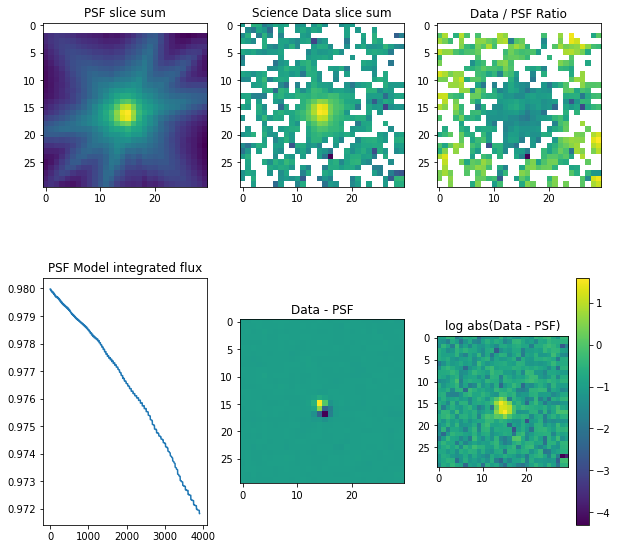

In [14]:
# Flip model PSF left-right.  For some unknown reason, WebbPSF is flipped with respect to the IPS simulation.
psf_model_fliplr = psf_model[:, ::-1, :]

# Smooth model
# EMSM smoothing for G140H grating
scalerad = 0.046  # sigma (arcsec)
pixelscale = 0.1
scalerad_pix = scalerad / pixelscale
psf_model_smoothed = scipy.ndimage.filters.gaussian_filter(psf_model_fliplr, 
                                                           (0.0, scalerad_pix, scalerad_pix), 
                                                           order=0, mode='reflect', cval=0.0,  
                                                           truncate=10.0)

# Empirically (chi-by-eye) determined shift
shiftx = 1.75    
shifty = 0.

# Shift model PSF using linear interpolation
psf_model_aligned = scipy.ndimage.shift(psf_model_smoothed, (0.0, shiftx, shifty), order=1, 
                                        mode='constant', cval=0.0, prefilter=True)

# Sum over wavelength
psf_model_sum = np.sum(psf_model_aligned, axis=0)

# Scale factor for PSF subtraction
psf_sum_min = np.amin(psf_model_sum)
psf_sum_max = np.amax(psf_model_sum)
scalefactor = np.amax(cube_sum) / psf_sum_max

# Plots
f, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(2, 3, figsize=(10, 10)) 

ax1.set_title("PSF slice sum")
ax1.imshow(psf_model_sum, norm=LogNorm())

ax2.set_title("Science Data slice sum")
ax2.imshow(cube_sum, norm=LogNorm()) 

ax3.set_title("Data / PSF Ratio")
ax3.imshow(cube_sum / psf_model_sum, norm=LogNorm())

ax4.set_title("PSF Model integrated flux")
ax4.plot(psf_model_fnusum)

ax5.set_title("Data - PSF")
ax5.imshow(cube_sum - scalefactor * psf_model_sum)

im6 = ax6.imshow(np.log10(np.absolute(cube_sum - scalefactor * psf_model_sum)))
plt.colorbar(im6)
ax6.set_title("log abs(Data - PSF)")

plt.show()

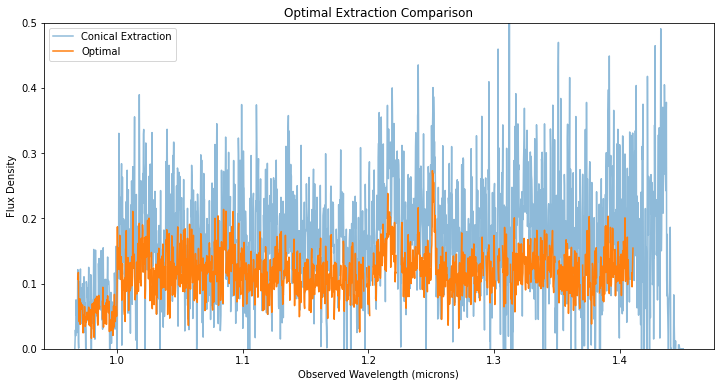

In [15]:
# Window PSF model (and replace NaNs)
profile = np.nan_to_num(psf_model_aligned[0:2059, :, :]) 

# Divide data by PSF model
data_norm = np.nan_to_num(data_win / profile)
data_norm_sum = np.sum(data_norm, axis=0) 

# Mask out bad data using 3-sigma clipping in each slice
data_norm_clipped = sigma_clip(data_norm, sigma=3.0, maxiters=5, axis=(1, 2))
data_norm_clipped_sum = np.sum(data_norm_clipped, axis=0)   
badvoxel = np.where(data_norm_clipped == 0)
data_clean = 1.0 * data_win
data_clean[badvoxel] = 0.0

# Optimal extraction, using model profile weight and variance cube from the simulated data
optimal_weight = profile ** 2 / data_var
optimal_weight_norm = np.sum(optimal_weight, axis=(1, 2))
spectrum_optimal = np.sum(profile * data_clean / data_var, axis=(1, 2)) / optimal_weight_norm

opt_scalefactor = np.median(np.nan_to_num(cone_sum / spectrum_optimal))  # = 1.33, not ~1.0 because PSF model isn't perfect

# Plots
f, (ax1) = plt.subplots(1, 1, figsize=(12, 6)) 
ax1.set_title("Optimal Extraction Comparison")
ax1.set_xlabel("Observed Wavelength (microns)") 
ax1.set_ylabel("Flux Density")
ax1.set_ylim(0, 0.5)
ax1.plot(wavelength, cone_sum, label="Conical Extraction", alpha=0.5)
ax1.plot(wavelength, spectrum_optimal, label="Optimal")
ax1.legend()

plt.show()

Filename: /Users/gough/.astropy/cache/download/url/aaf16a39c40575c919f074757ea17caa/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     295   ()      
  1  SCI           1 ImageHDU        64   (33, 39, 2059)   float32   
  2  ERR           1 ImageHDU        12   (33, 39, 2059)   float32   
  3  DQ            1 ImageHDU        12   (33, 39, 2059)   int32 (rescales to uint32)   
  4  WMAP          1 ImageHDU        10   (33, 39, 2059)   float32   
  5  ASDF          1 BinTableHDU     11   1R x 1C   [10314B]   


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVE'  
CRVAL : 156.1778928912249  -45.68697658856264  9.665214562483711e-07  
CRPIX : 17.0  20.0  1.0  
PC1_1 PC1_2 PC1_3  : -0.8098302221786426  -0.586664308822422  0.0  
PC2_1 PC2_2 PC2_3  : -0.586664308822422  0.8098302221786426  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 2.77777781916989e-05  2.77777781916989e-05  2.3499999952036797e-10  
NAXIS : 33  39  2059


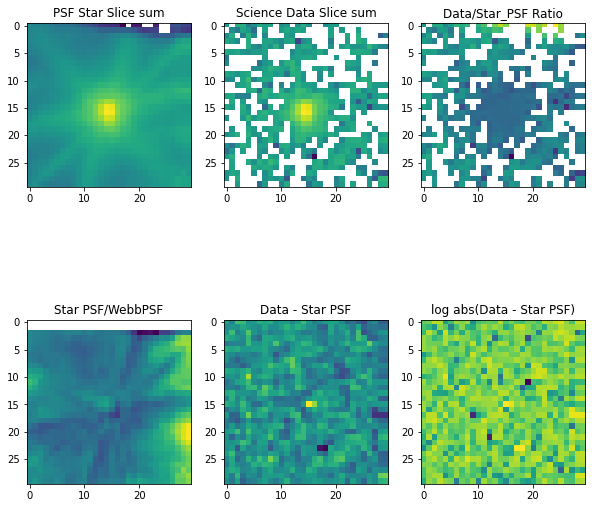

In [16]:
BoxPath = "https://data.science.stsci.edu/redirect/JWST/jwst-data_analysis_tools/IFU_optimal_extraction/"
filename_star = BoxPath + "NRS00001-brightQSO-F100LP-G140H-01_1_491_SE_2020-08-26T12h15m00_s3d.fits"

# Open and inspect the file and WCS
with fits.open(filename_star, memmap=False) as hdulist:
    sci_star = hdulist['SCI'].data
    err_star = hdulist['ERR'].data
    w_star = wcs.WCS(hdulist[1].header)
    hdr_star = hdulist[1].header
    hdulist.info()
    print(w_star)
    
# Load with Spectrum1D    
spec1d_star = Spectrum1D.read(filename_star)

# Wavelengths
wavelength_star = np.array(spec1d_star.spectral_axis.value)

# Window reference star to match science data (and replace NaNs)
ref_star = np.nan_to_num(sci_star[:, 5:-4, 3:])

# Sum over spaxels
ref_star_fnusum = np.sum(ref_star, axis=(1, 2))

# Normalize PSF star profile to unity. (The flux will still be slightly off. Please see Developer's Note below.)
ref_star_norm = []
for idx, norm in zip(range(len(wavelength_star)), ref_star_fnusum):
    ref_star_norm.append(ref_star[idx] / norm)
profile_star = np.array(ref_star_norm)
    
# Sum over spaxels 
profile_star_fnusum = np.sum(profile_star, axis=(1, 2))

# Sum over wavelength
profile_star_sum = np.sum(profile_star, axis=0)

# Scale factor for PSF subtraction
profile_star_sum_max = np.amax(profile_star_sum)
star_scalefactor = np.amax(cube_sum) / profile_star_sum_max

# Make slight adjustment to scale factor
star_scalefactor = 0.175

# Plots
f, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(2, 3, figsize=(10, 10)) 

ax1.imshow(profile_star_sum, norm=LogNorm())
ax1.set_title("PSF Star Slice sum")

ax2.imshow(cube_sum, norm=LogNorm()) 
ax2.set_title("Science Data Slice sum")

ax3.imshow(cube_sum / profile_star_sum, norm=LogNorm())
ax3.set_title("Data/Star_PSF Ratio")

star_model_ratio = profile_star_sum / psf_model_sum
ax4.imshow(star_model_ratio, norm=LogNorm())
ax4.set_title("Star PSF/WebbPSF")

ax5.imshow(cube_sum - star_scalefactor * profile_star_sum)
ax5.set_title("Data - Star PSF")

ax6.imshow(np.log10(np.absolute(cube_sum - star_scalefactor * profile_star_sum)))
ax6.set_title("log abs(Data - Star PSF)")

plt.show()

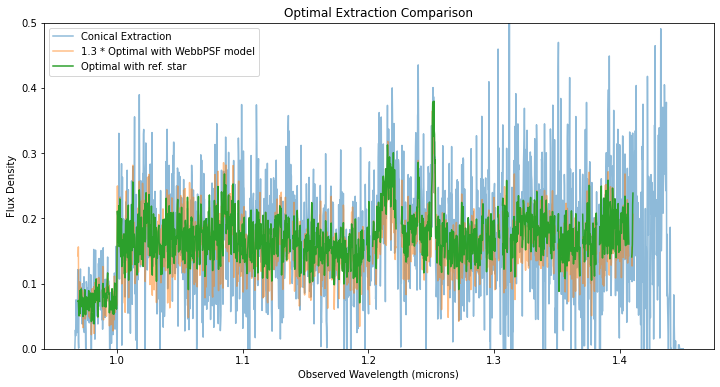

In [17]:
# Mask out bad data using 3-sigma clipping in each slice
data_norm = np.nan_to_num(data_win / profile_star)
data_norm_clipped = sigma_clip(data_norm, sigma=3.0, maxiters=5, axis=(1, 2))
data_norm_clipped_sum = np.sum(data_norm_clipped, axis=0)   
badvoxel = np.where(data_norm_clipped == 0)[0]
data_clean = 1.0 * data_win
data_clean[badvoxel] = 0.0

# Optimal extraction, using model profile weight and variance cube from the simulated data
optimal_weight = profile_star**2 / data_var
optimal_weight_norm = np.sum(optimal_weight, axis=(1, 2))
spectrum_optimal_star = np.sum(profile_star * data_clean / data_var, axis=(1, 2)) / optimal_weight_norm

# Plots
f, (ax1) = plt.subplots(1, 1, figsize=(12, 6)) 
ax1.set_title("Optimal Extraction Comparison")
ax1.set_xlabel("Observed Wavelength (microns)") 
ax1.set_ylabel("Flux Density")
ax1.set_ylim(0, 0.5)

ax1.plot(wavelength, cone_sum, label="Conical Extraction", alpha=0.5)
ax1.plot(wavelength, spectrum_optimal * opt_scalefactor, label="1.3 * Optimal with WebbPSF model", alpha=0.5)
ax1.plot(wavelength, spectrum_optimal_star, label="Optimal with ref. star")
ax1.legend()

plt.show()